In [ ]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

In [3]:
import networkx as nx
import numpy
%matplotlib inline
import matplotlib.pyplot as plt
import pickle
import random
from utils.graph_creation import create_benchmark

# Test

In [13]:
cli = [9,12,15,18,21,27,30,33,36,39,42,45]
total = [30,40,50,60,70,80,90,100,110,120,130,140,150]
for i,j in zip(cli,total):
    c=i
    tot = j
    ex = tot-c
    G, cli_func  = create_benchmark(c, ex)
    print(f"Grafo {c}_{ex}")
    print(f"Rapporto = {c/tot} ")
    for key in cli_func:
        print(f"Cricca {key}: {cli_func[key][0]}")
        print(f"Dimensione: {len(cli_func[key][0])}. Valore funzione: {cli_func[key][1]}")
    print("\n")
    with open(f"./output/static_ratio_3/graphs/{c}_{ex}.pkl", "wb") as f:
        pickle.dump(G, f)
    with open(f"./output/static_ratio_3/cli_func/{c}_{ex}.pkl", "wb") as f:
        pickle.dump(cli_func, f)
    

Grafo 9_21
Rapporto = 0.3 
Cricca 0: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Dimensione: 9. Valore funzione: 0.3927764200495318
Cricca 1: [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Dimensione: 15. Valore funzione: 0.342116554321655
Cricca 2: [24, 25, 26, 27, 28, 29]
Dimensione: 6. Valore funzione: 0.2231203149567617


Grafo 12_28
Rapporto = 0.3 
Cricca 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Dimensione: 12. Valore funzione: 0.49116430203357375
Cricca 1: [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Dimensione: 19. Valore funzione: 0.483386371754259
Cricca 2: [31, 32, 33, 34, 35, 36]
Dimensione: 6. Valore funzione: 0.2675735784325239
Cricca 3: [37, 38, 39]
Dimensione: 3. Valore funzione: 0.10270282264791851


Grafo 15_35
Rapporto = 0.3 
Cricca 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Dimensione: 15. Valore funzione: 0.7688704281393427
Cricca 1: [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 

In [13]:
with open(f"./output/static_clique/graphs/{c}_{ex}.pkl", "wb") as f:
    pickle.dump(G, f)
with open(f"./output/static_clique/cli_func/{c}_{ex}.pkl", "wb") as f:
    pickle.dump(cli_func, f)

In [181]:
with open(f"./output/static_ratio/graphs/{c}_{ex}.pkl", "rb") as f:
    G_load = pickle.load(f)
with open(f"./output/static_ratio/cli_func/{c}_{ex}.pkl", "rb") as f:
    f_load = pickle.load(f)

# Manual

In [112]:
G = nx.Graph()

In [113]:
c1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
c2 = [0,1,2,3,4,5,16,17,18,19,20,21,22,23,24,25]
c3 = [0,1,2,3,4,5,26,27,28,29,30,31,32,33,34,35]
c4 = [0,1,2,3,4,5,36,37,38,39,40,41,42,43,44,45]
c5 = [0,1,2,3,4,5,46,47,48,49,50,51,52,53,54,55]
nodes = [i for i in range(56)]
e1 = [(i,j) for i in c1 for j in c1 if i<j]
e2 = [(i,j) for i in c2 for j in c2 if i<j]
e3 = [(i,j) for i in c3 for j in c3 if i<j]
e4 = [(i,j) for i in c4 for j in c4 if i<j]
e5 = [(i,j) for i in c5 for j in c5 if i<j]
#e1 = [(i,j) for i in range(10) for j in range(10) if i<j]
#e2 = [(i,j) for i in range(11,40) for j in range(11,40) if i<j]
#e3 = [(i,j) for i in range(35,50) for j in range(35,50) if i<j]
#e4 = [(i,j) for i in range(60,100) for j in range(60,100) if i<j]
#e5 = [(i,j) for i in range(22,26) for j in range(22,26) if i<j]
#other = [(9,10), (29,30), (59,60)]
edges = e1+e2+e3+e4+e5

In [114]:
for i in nodes:
    G.add_node(i)
G.add_edges_from(edges)

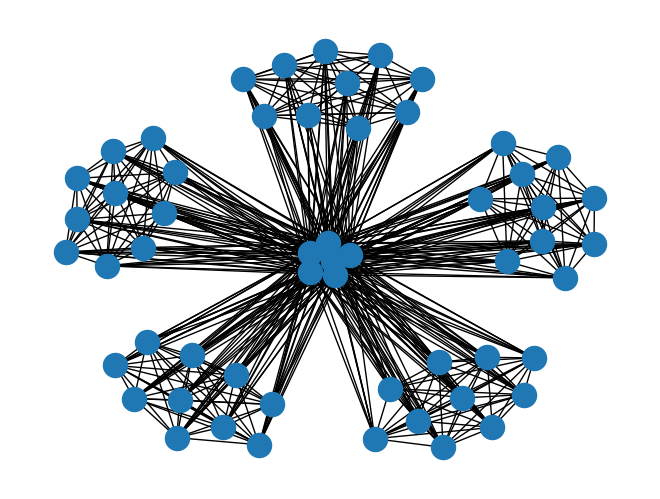

In [115]:
nx.draw(G)
plt.show()

In [116]:
while True:
    g_copy = G.copy()
    attributes = {}
    for i in range(56):
        if i >5:
            w1 = random.uniform(0,0.027290137282490516/3)
            w2 = random.uniform(0,0.03640364796375065/3)
            w3 = random.uniform(0,0.04098560068502567/3)
            w4 = random.uniform(0,0.04098560068502567/3)
        else:
            w1 = random.uniform(0,0.027290137282490516)
            w2 = random.uniform(0,0.03640364796375065)
            w3 = random.uniform(0,0.04098560068502567)
            w4 = random.uniform(0,0.04098560068502567)
        attr_dict = {'w1':w1, 'w2':w2, 'w3':w3, 'w4':w4}
        attributes[i]=attr_dict
    nx.set_node_attributes(g_copy, attributes)
    if func_max(g_copy, c1) > func_max(g_copy, c2) and \
        func_max(g_copy, c1) > func_max(g_copy, c3) and \
        func_max(g_copy, c1) > func_max(g_copy, c4) and \
        func_max(g_copy, c1) > func_max(g_copy, c5):
        break

In [106]:
attributes = {}
for i in [0,1,2,3,4,5]:
    w1 = random.uniform(0,0.027290137282490516)
    w2 = random.uniform(0,0.03640364796375065)
    w3 = random.uniform(0,0.04098560068502567)
    w4 = random.uniform(0,0.04098560068502567)
    attr_dict = {'w1':w1, 'w2':w2, 'w3':w3, 'w4':w4}
    attributes[i]=attr_dict

c1_cut = [6,7,8,9,10,11,12,13,14,15]
c2_cut = [16,17,18,19,20,21,22,23,24,25]
c3_cut = [26,27,28,29,30,31,32,33,34,35]
c4_cut = [36,37,38,39,40,41,42,43,44,45]
c5_cut = [46,47,48,49,50,51,52,53,54,55]
for i1,i2,i3,i4,i5 in zip(c1_cut,c2_cut,c3_cut,c4_cut,c5_cut):
    w1 = random.uniform(0,0.027290137282490516)
    w2 = random.uniform(0,0.03640364796375065)
    w3 = random.uniform(0,0.04098560068502567)
    w4 = random.uniform(0,0.04098560068502567)
    attr_dict = {'w1':w1, 'w2':w2, 'w3':w3, 'w4':w4}
    attributes[i1]=attr_dict
    attributes[i2]=attr_dict
    attributes[i3]=attr_dict
    attributes[i4]=attr_dict
    attributes[i5]=attr_dict

In [117]:
nx.set_node_attributes(G, attributes)

In [118]:
print(f"cricca:{c1} con peso:{func_max(G, c1)}")
print(f"cricca:{c2} con peso:{func_max(G, c2)}")
print(f"cricca:{c3} con peso:{func_max(G, c3)}")
print(f"cricca:{c4} con peso:{func_max(G, c4)}")
print(f"cricca:{c5} con peso:{func_max(G, c5)}")
#print(f"1° cricca:{[i for i in range(18)]} con peso:{func_max(G, [i for i in range(18)])}")
#print(f"2° cricca:{[i for i in range(11,40)]} con peso:{func_max(G, [i for i in range(11,40)])}")
#print(f"3° cricca:{[i for i in range(35,50)]} con peso:{func_max(G, [i for i in range(35,50)])}")
#print(f"4° cricca:{[i for i in range(60,100)]} con peso:{func_max(G, [i for i in range(60,100)])}")
#print(f"5° cricca:{[i for i in range(22,26)]} con peso:{func_max(G, [i for i in range(22,26)])}")
#print("Archi aggiuntivi: (9,10), (29,30), (59,60)")

cricca:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] con peso:0.33102047560503467
cricca:[0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25] con peso:0.3118626997774065
cricca:[0, 1, 2, 3, 4, 5, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] con peso:0.3009242591707737
cricca:[0, 1, 2, 3, 4, 5, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45] con peso:0.3124025933907205
cricca:[0, 1, 2, 3, 4, 5, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55] con peso:0.2990147828002141


In [119]:
cli_func = [c1,c2,c3,c4,c5]
cli_func

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [0, 1, 2, 3, 4, 5, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25],
 [0, 1, 2, 3, 4, 5, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
 [0, 1, 2, 3, 4, 5, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45],
 [0, 1, 2, 3, 4, 5, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]]

In [120]:
start_point = [0,1,2,3,4,5]

In [121]:
with open("./output/test_reverse/graphs/5_not_equal.pkl", "wb") as f:
    pickle.dump(G, f)
with open("./output/test_reverse/cliques/5_not_equal.pkl", "wb") as f:
    pickle.dump(cli_func, f)
with open("./output/test_reverse/start_point/5_not_equal.pkl", "wb") as f:
    pickle.dump(start_point, f)

# Test max func
### Analisys of cliques with maximum value of weights for each node. The aim is to see how many nodes ‘saturate’ the target function

In [30]:
func = []
cli = []
for k in range(2,50):
    M = nx.Graph()
    nodes = [i for i in range(k)]
    edges = [(i,j) for i in range(k) for j in range(k) if i<j]
    for i in nodes:
        M.add_node(i)
    M.add_edges_from(edges)
    attributes = {}
    for i in range(k):
        w1 = 0.027290137282490516
        w2 = 0.03640364796375065
        w3 = 0.04098560068502567
        w4 = 0.04098560068502567
        attr_dict = {'w1':w1, 'w2':w2, 'w3':w3, 'w4':w4}
        attributes[i]=attr_dict
    nx.set_node_attributes(M, attributes)
    #print(f"cricca:{[i for i in range(k)]} con peso:{func_max(G, [i for i in range(k)])}")
    cli.append(k)
    try:
        func.append(func_max(M, [l for l in range(k)]))
    except:
        print(k)

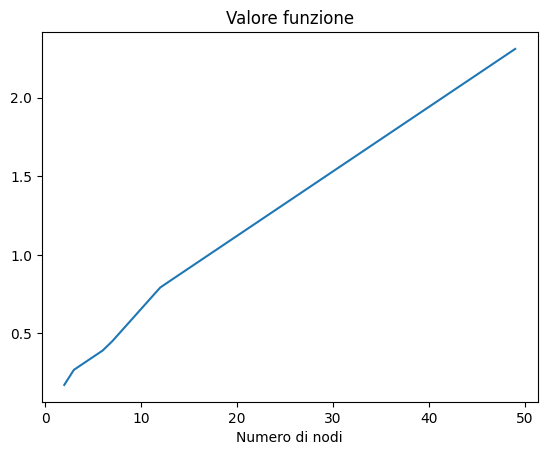

In [35]:
plt.plot(cli, func)
plt.xlabel("Numero di nodi")
plt.title("Valore funzione")
plt.show()

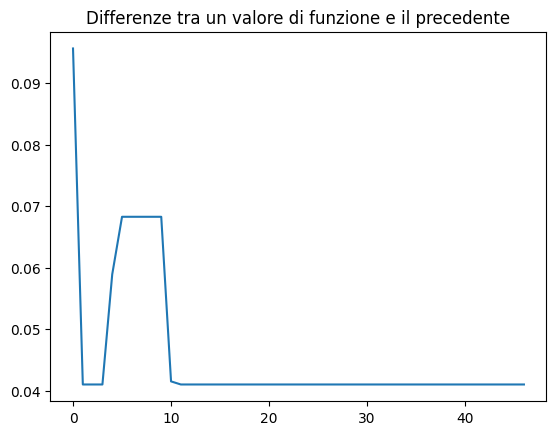

In [34]:
#plottando le differenze si nota come bastano 10 nodi con peso al valore massimo per "saturare" la funzione
diff = [func[i]-func[i-1] for i in range(1, len(func))]
x = [i for i in range(len(diff))]
plt.plot(x, diff)
plt.title("Differenze tra un valore di funzione e il precedente")
plt.show()

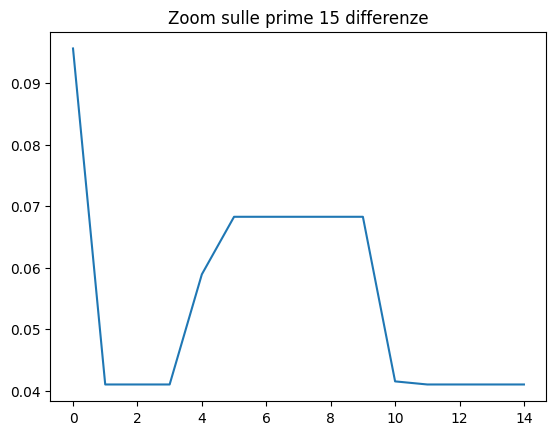

In [36]:
#zoom sui primi 15 valori
diff = [func[i]-func[i-1] for i in range(1, len(func))]
x = [i for i in range(len(diff))]
plt.plot(x[0:15], diff[0:15])
plt.title("Zoom sulle prime 15 differenze")
plt.show()